In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
import yfinance as yf

In [6]:
BAC = yf.download("BAC",start='2016-09-06',end="2021-09-03")

# JP Morgan
JPM = yf.download("JPM",start='2016-09-06',end="2021-09-03")

# CitiGroup
C = yf.download('C',start='2016-09-06',end="2021-09-03")

# HSBC
HSBC = yf.download("HSBC",start='2016-09-06',end="2021-09-03")

#Royal Bank of Canada
RY = yf.download("RY",start='2016-09-06',end="2021-09-03")

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [23]:
BAC_r=BAC['Adj Close']
JPM_r=JPM['Adj Close']
C_r=C['Adj Close']
RY_r=RY['Adj Close']
HSBC_r=HSBC['Adj Close']

retail=pd.concat([BAC_r,JPM_r,C_r,RY_r,HSBC_r],axis=1)

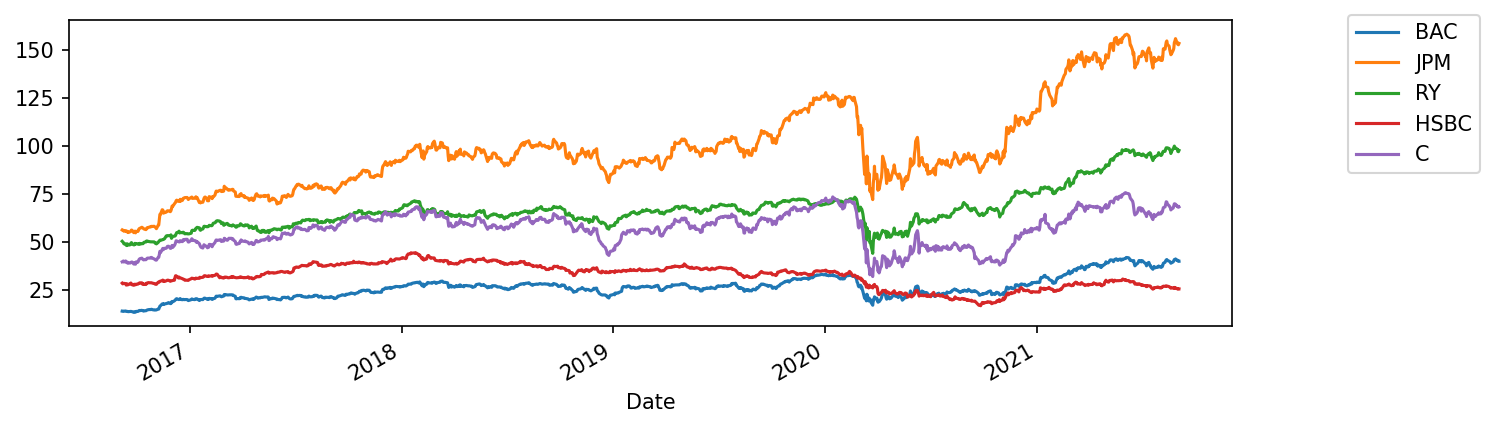

In [7]:
fig,ax = plt.subplots(dpi=150,figsize=(10,3))
BAC['Adj Close'].plot(ax=ax,label='BAC')
JPM['Adj Close'].plot(ax=ax,label='JPM')
RY['Adj Close'].plot(ax=ax,label='RY')
HSBC['Adj Close'].plot(ax=ax,label='HSBC')
C['Adj Close'].plot(ax=ax,label='C')
plt.legend(loc=(1.1,0.5))

In [8]:
portfolio_dict = {'BAC':BAC,'JPM':JPM,'C':C,'HSBC':HSBC,'RY':RY}

In [9]:
def daily_ret(tickers):
    tickers['daily_returns']=(tickers['Adj Close']-tickers['Adj Close'].shift(1))/tickers['Adj Close'].shift(1)
    tickers=tickers.dropna()

In [10]:
daily_ret(BAC)
daily_ret(HSBC)
daily_ret(C)
daily_ret(RY)
daily_ret(JPM)

In [13]:
def boolinger_bands(ticker):
    

    fig,ax = plt.subplots(figsize=(10,3),dpi=150)
    ticker['MA'] = ticker['Adj Close'].rolling(20).mean()
    ticker['STD'] =ticker['Adj Close'].rolling(20).std()
    ticker['BOL_UPPER'] =ticker['MA'] + 2*ticker['STD']
    ticker['BOL_LOWER'] = ticker['MA'] - 2*ticker['STD']
    ticker[['Adj Close','BOL_UPPER','BOL_LOWER']].plot(ax=ax)

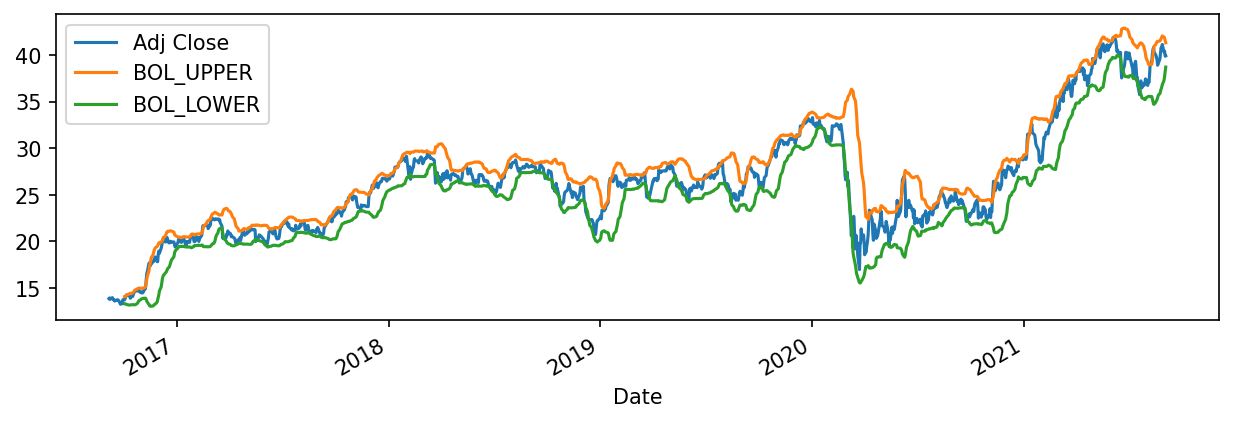

In [14]:
boolinger_bands(BAC)

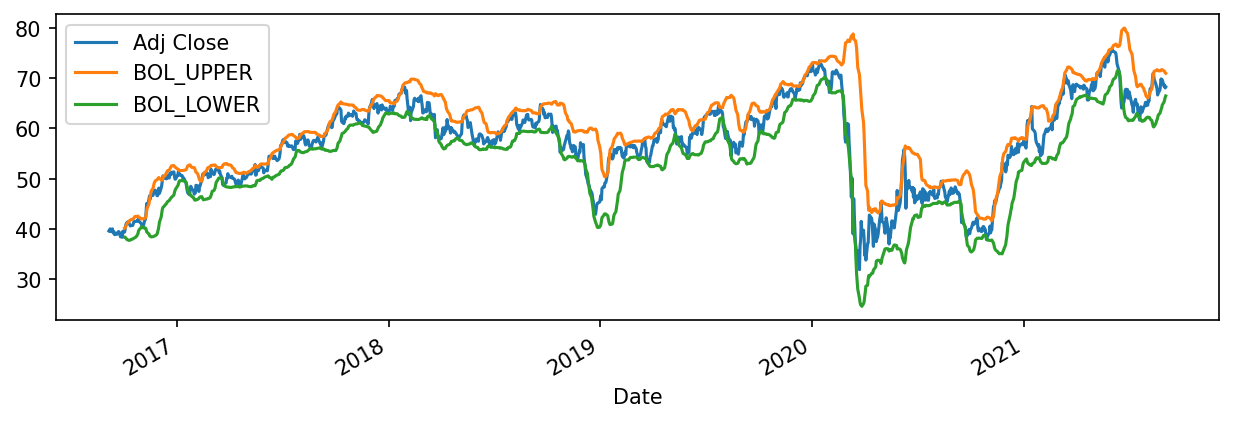

In [15]:
boolinger_bands(C)

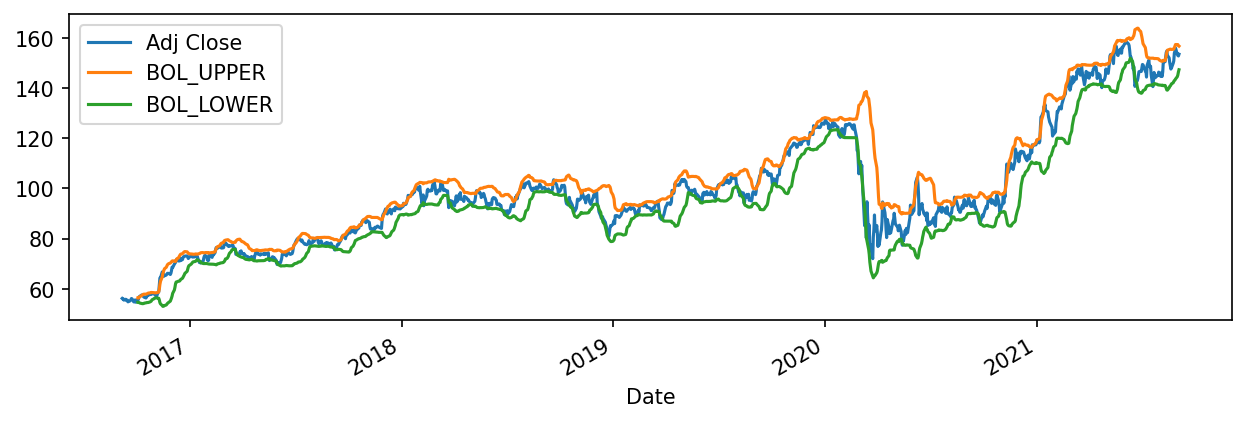

In [17]:
boolinger_bands(JPM)

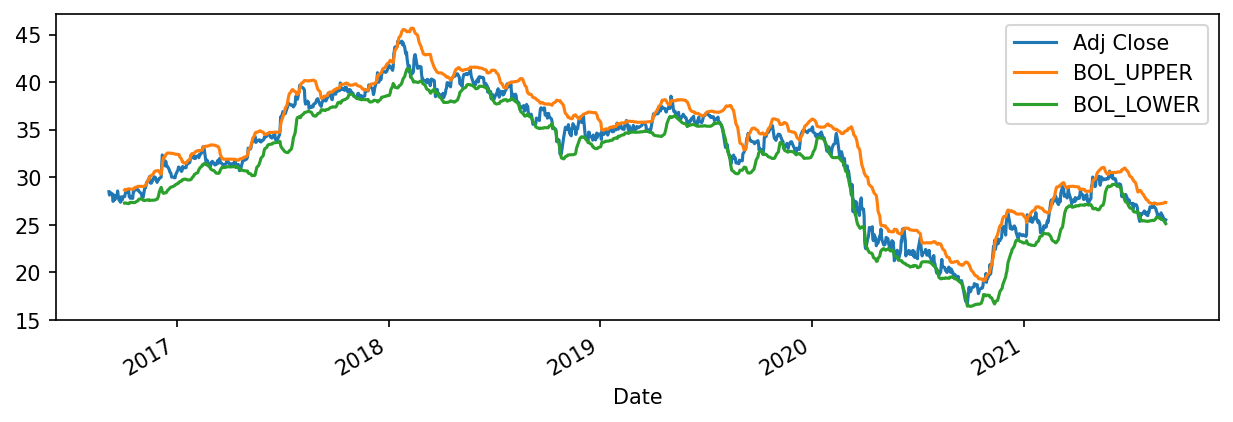

In [18]:
boolinger_bands(HSBC)

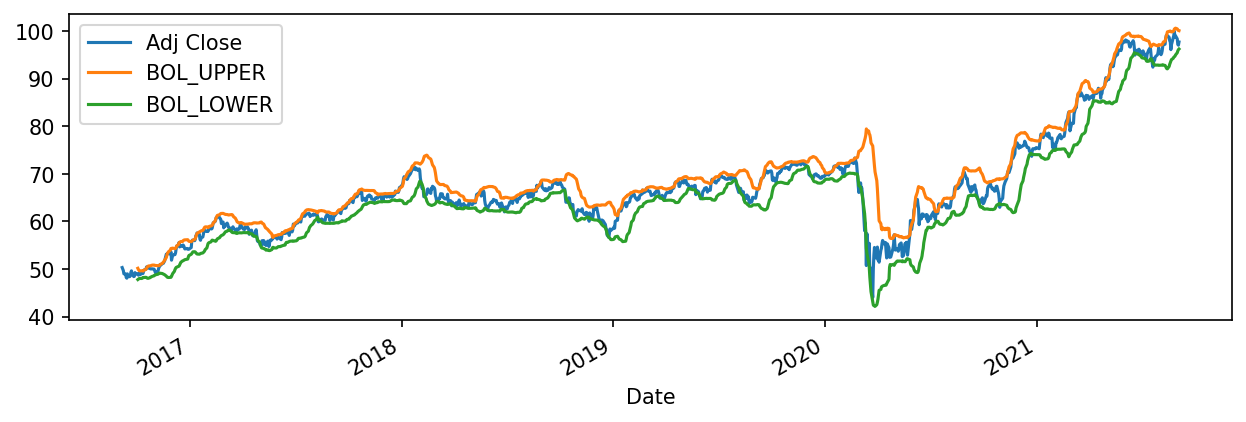

In [19]:
boolinger_bands(RY)

In [24]:
retail_returns = retail.pct_change(1).dropna()

In [26]:
retail_returns.columns=['BAC','JPM','C','RY','HSBC']

In [27]:
retail_returns

,BAC,JPM,C,RY,HSBC
Date,,,,,
2016-09-07 00:00:00-04:00,-0.005070,-0.004152,0.004018,-0.006456,-0.012523
2016-09-08 00:00:00-04:00,0.010191,0.001340,0.006529,-0.006181,0.008983
2016-09-09 00:00:00-04:00,-0.007566,-0.008922,-0.012974,-0.013873,-0.000262
2016-09-12 00:00:00-04:00,0.010165,0.006152,0.013144,-0.000808,-0.004715
2016-09-13 00:00:00-04:00,-0.011321,-0.007903,-0.018205,-0.014889,-0.027368
...,...,...,...,...,...
2021-08-27 00:00:00-04:00,0.010704,0.008037,0.007592,0.002682,0.006674
2021-08-30 00:00:00-04:00,-0.019534,-0.016007,-0.018085,-0.006591,-0.017311
2021-08-31 00:00:00-04:00,0.002160,-0.003054,0.003349,-0.011923,-0.008995


In [32]:
(1 + retail_returns['JPM']).cumprod() - 1 
(1 + retail_returns['HSBC']).cumprod() - 1 
(1 + retail_returns['RY']).cumprod() - 1 
(1 + retail_returns['C']).cumprod() - 1 
(1 + retail_returns['BAC']).cumprod() - 1 

In [38]:
(1 + retail_returns['JPM']).cumprod() - 1

Date
2016-09-07 00:00:00-04:00   -0.004152
2016-09-08 00:00:00-04:00   -0.002818
2016-09-09 00:00:00-04:00   -0.011714
2016-09-12 00:00:00-04:00   -0.005635
2016-09-13 00:00:00-04:00   -0.013494
                               ...   
2021-08-27 00:00:00-04:00    1.774538
2021-08-30 00:00:00-04:00    1.730125
2021-08-31 00:00:00-04:00    1.721787
2021-09-01 00:00:00-04:00    1.717874
2021-09-02 00:00:00-04:00    1.730466
Name: JPM, Length: 1257, dtype: float64

In [37]:
(1 + retail_returns['HSBC']).cumprod() - 1 

Date
2016-09-07 00:00:00-04:00   -0.012523
2016-09-08 00:00:00-04:00   -0.003653
2016-09-09 00:00:00-04:00   -0.003913
2016-09-12 00:00:00-04:00   -0.008610
2016-09-13 00:00:00-04:00   -0.035742
                               ...   
2021-08-27 00:00:00-04:00   -0.086209
2021-08-30 00:00:00-04:00   -0.102028
2021-08-31 00:00:00-04:00   -0.110106
2021-09-01 00:00:00-04:00   -0.102365
2021-09-02 00:00:00-04:00   -0.104047
Name: HSBC, Length: 1257, dtype: float64

In [36]:
(1 + retail_returns['RY']).cumprod() - 1 

Date
2016-09-07 00:00:00-04:00   -0.006456
2016-09-08 00:00:00-04:00   -0.012597
2016-09-09 00:00:00-04:00   -0.026295
2016-09-12 00:00:00-04:00   -0.027082
2016-09-13 00:00:00-04:00   -0.041568
                               ...   
2021-08-27 00:00:00-04:00    0.967522
2021-08-30 00:00:00-04:00    0.954554
2021-08-31 00:00:00-04:00    0.931250
2021-09-01 00:00:00-04:00    0.928054
2021-09-02 00:00:00-04:00    0.941586
Name: RY, Length: 1257, dtype: float64

In [35]:
(1 + retail_returns['C']).cumprod() - 1

Date
2016-09-07 00:00:00-04:00    0.004018
2016-09-08 00:00:00-04:00    0.010573
2016-09-09 00:00:00-04:00   -0.002537
2016-09-12 00:00:00-04:00    0.010573
2016-09-13 00:00:00-04:00   -0.007824
                               ...   
2021-08-27 00:00:00-04:00    0.757910
2021-08-30 00:00:00-04:00    0.726119
2021-08-31 00:00:00-04:00    0.731899
2021-09-01 00:00:00-04:00    0.717448
2021-09-02 00:00:00-04:00    0.722024
Name: C, Length: 1257, dtype: float64

In [34]:
(1 + retail_returns['BAC']).cumprod() - 1

Date
2016-09-07 00:00:00-04:00   -0.005070
2016-09-08 00:00:00-04:00    0.005070
2016-09-09 00:00:00-04:00   -0.002535
2016-09-12 00:00:00-04:00    0.007605
2016-09-13 00:00:00-04:00   -0.003802
                               ...   
2021-08-27 00:00:00-04:00    1.963112
2021-08-30 00:00:00-04:00    1.905230
2021-08-31 00:00:00-04:00    1.911507
2021-09-01 00:00:00-04:00    1.872454
2021-09-02 00:00:00-04:00    1.875258
Name: BAC, Length: 1257, dtype: float64

In [40]:
retail_returns_cov=retail_returns.cov()

In [41]:
retail_returns_cov

,BAC,JPM,C,RY,HSBC
BAC,0.000454,0.000375,0.000438,0.000205,0.000214
JPM,0.000375,0.000357,0.000389,0.000188,0.000191
C,0.000438,0.000389,0.000531,0.000228,0.000227
RY,0.000205,0.000188,0.000228,0.000179,0.000116
HSBC,0.000214,0.000191,0.000227,0.000116,0.000242


In [42]:
def calculate_volatility(weights,retail_returns_cov):
    annualized_cov = np.dot(retail_returns_cov*252,weights)
    vol = np.dot(weights.transpose(),annualized_cov)
    return np.sqrt(vol)

In [44]:
def gen_weights(N):
    weights = np.random.random(N)
    return weights/ np.sum(weights)

In [43]:
def calculate_returns(weights,retail_returns):
    return np.sum(retail_returns.mean()*weights) * 252

In [52]:
mc_portfolio_returns = []
mc_portfolio_vol = []
mc_weights = []
for sim in range(90000):
    # This may take awhile!
    weights = gen_weights(N=5)
    mc_weights.append(weights)
    mc_portfolio_returns.append(calculate_returns(weights,retail_returns))
    mc_portfolio_vol.append(calculate_volatility(weights,retail_returns_cov))

In [53]:
mc_sharpe_ratios = np.array(mc_portfolio_returns)/np.array(mc_portfolio_vol)

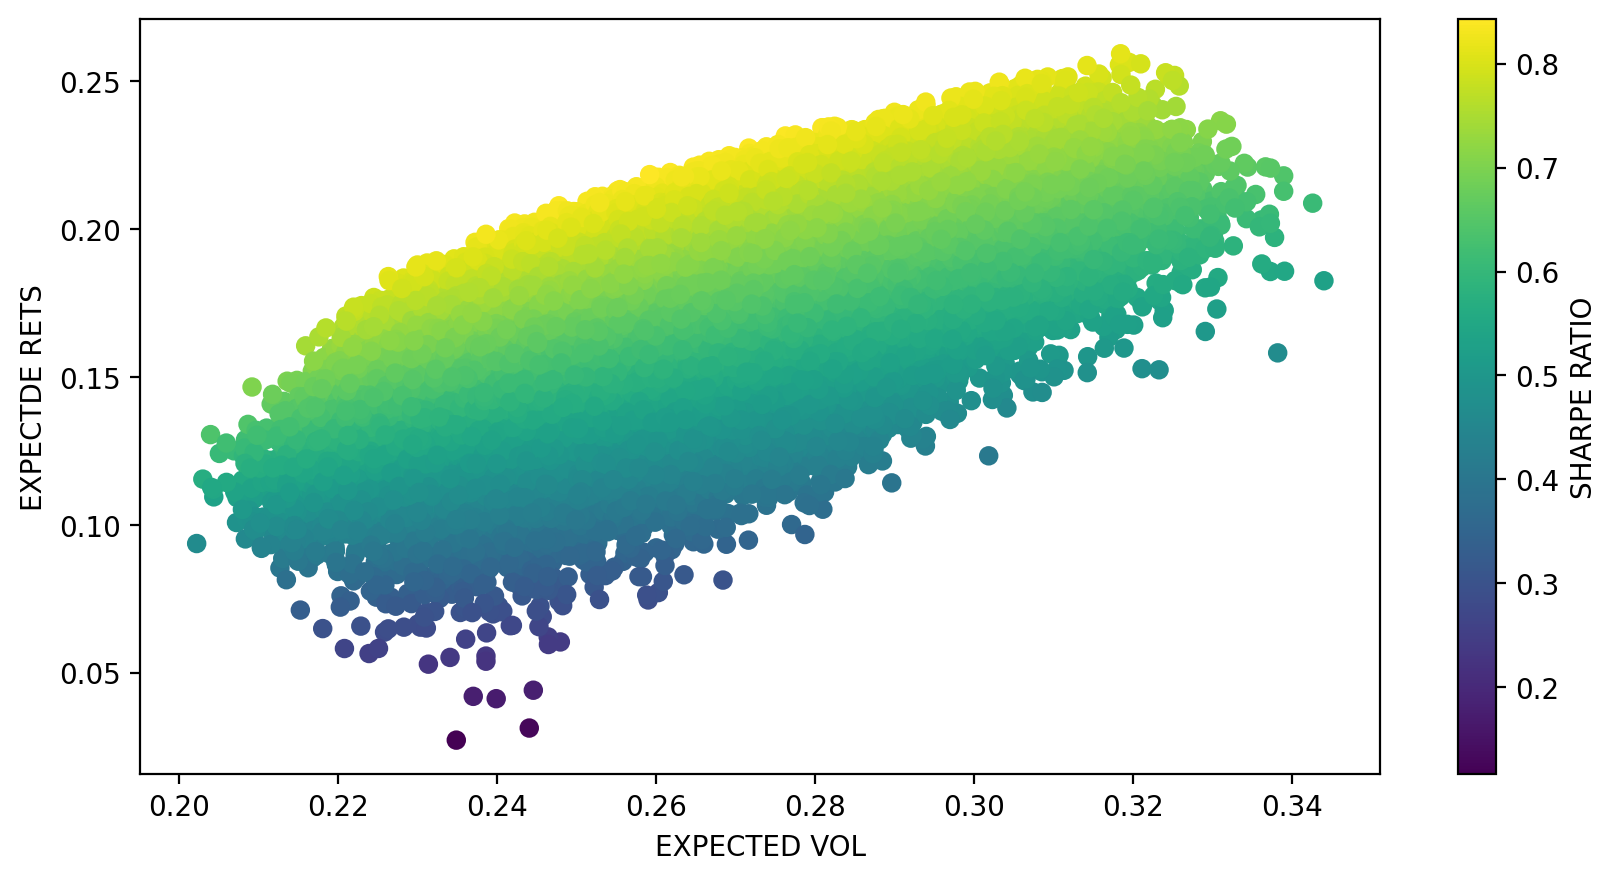

In [54]:
plt.figure(dpi=200,figsize=(10,5))
plt.scatter(mc_portfolio_vol,mc_portfolio_returns,c=mc_sharpe_ratios)
plt.ylabel('EXPECTDE RETS')
plt.xlabel('EXPECTED VOL')
plt.colorbar(label="SHARPE RATIO");

In [63]:
mc_weights[np.argmax(mc_sharpe_ratios)]

array([2.60187553e-01, 3.68275338e-01, 5.43017455e-05, 3.70834570e-01,
       6.48237194e-04])

In [55]:
from scipy.optimize import minimize

In [56]:
def function_to_minimize(weights):
    # Note -1* because we need to minimize this
    # Its the same as maximizing the positive sharpe ratio
    return -1 * (calculate_returns(weights,retail_returns)/calculate_volatility(weights,retail_returns_cov))

In [57]:
bounds = tuple((0,1) for n in range(5))

In [58]:
bounds

((0, 1), (0, 1), (0, 1), (0, 1), (0, 1))

In [59]:
equal_weights = 5 * [1/5]

In [60]:
equal_weights

[0.2, 0.2, 0.2, 0.2, 0.2]

In [61]:
sum_constraint = ({'type': 'eq', 'fun': lambda weights: np.sum(weights)-1})

In [62]:
minimize(fun=function_to_minimize,x0=equal_weights,bounds=bounds,constraints=sum_constraint)

     fun: -0.8438084237320502
     jac: array([-1.75207853e-04, -6.28903508e-05,  4.04455960e-01,  1.51321292e-04,
        5.08126765e-01])
 message: 'Optimization terminated successfully'
    nfev: 48
     nit: 8
    njev: 8
  status: 0
 success: True
       x: array([1.57305209e-01, 4.66599920e-01, 5.11662110e-16, 3.76094870e-01,
       6.28837260e-17])

In [64]:
optimal=[1.57305209e-01, 4.66599920e-01, 5.11662110e-16, 3.76094870e-01,
       6.28837260e-17]

In [65]:
individ_returns=[1.875258,1.730466,0.722024,0.941586,-0.104047]

In [66]:
final_rets=np.dot(optimal,individ_returns)

In [67]:
final_rets

1.4565488130454625